# Introduction to Pandas

## Outline
 - [Data](#data)
 - [Pandas](#pandas)
     - [Series](#series)
     - [DataFrames](#dframes)
     - [Saving Data](#save)

***

We will now expand our use of conditional statements by allowing for multiple conditions.

<b> Reminders: </b> 
  
  1) Use print statements check what your code is doing (or not doing) as you write it
  
  2) Comment your code!
***

In [1]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Revisited <a id='data'> </a>

<b> Observations vs Predictors. </b>

Observations (usually represented by rows) are records of measurements (e.g., the different movies in the Netflix challenge problem).

Predictors (usually represented by columns) are typically different variables for which measurements can be taken.

<b> Quantitative vs Qualitative data. </b>

Quantitative data is numerical and defines some measurement. This data can be discrete (as in counting the number of pennies are in your couch) or continuous (as in the temperature outside).

Qualitative data is categorical and usually some attribute is assigned to an observation. For example, eye color would be an example of a qualitative observation.

In [29]:
# Create some data
x = np.linspace(0, 10, 500)
y = x**2
#y2 = np.cumsum(np.random.randn(500))


#use help(np.linspace) to find out what it does.
# what do these functions do?
# what is the shape of x and y?
print(x.shape)
print(y.shape)

(500,)
(500,)


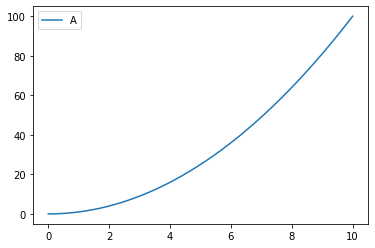

In [30]:
# let's plot the results
plt.plot(x, y)
plt.legend('A', loc='upper left');

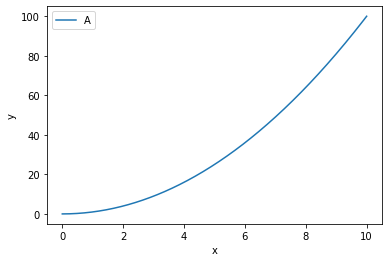

In [33]:
# let's plot the results and save the figure
# initiate an empty figure
fig = plt.figure()
# plot my awesome stuff
plt.plot(x, y)
plt.legend('A', loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
# save the figure
fig.savefig('first_fig.pdf')

<b> Practice! </b> Plot `x,y2` instead and save the figure. Add axes labels and title

## Pandas <a id='pandas'> </a>

1) Pandas is package built upon NumPy's interface in which we can create DataFrame objects and begin looking at data. We can import this package as
```python
import pandas as pd
```

Let's load the pandas package now

In [34]:
import pandas as pd

### Series
Series are one-dimensional arrays of indexed data. You can also think of this as a generalized version of a NumPy array. You can create a series with the following format
```python
pd.Series(data, index=index)
```

In [35]:
dat = pd.Series([0,1,2,3,-2])
# let's check the values in dat
dat.values

array([ 0,  1,  2,  3, -2])

In [36]:
dat

0    0
1    1
2    2
3    3
4   -2
dtype: int64

In [37]:
dat.index

RangeIndex(start=0, stop=5, step=1)

In [38]:
# we can also access elements in dat
#print(dat)
dat[0:3]

0    0
1    1
2    2
dtype: int64

#### Series as dictionaries. 

<b> Dictionaries </b> are objects in which values are accessed by keys/indices. Keys can be strings or integers.¶

In [39]:
# let's add an index that is more meaningful
fruits = pd.Series([0.99, 4.99, 2.99],
                   index = ['apples','cherries', 'grapes'])
#
fruits
print(fruits.values)
print(fruits.index)

[0.99 4.99 2.99]
Index(['apples', 'cherries', 'grapes'], dtype='object')


In [40]:
# Now, we can access fruit prices by using the appropriate index.
# Adding indices provides a mapping from a collection of keys 
# to a collection of values.
fruits['grapes']

2.99

In [21]:
# Adding a key with missing information
#fruits['mangos'] = None #vs 
fruits['mangos'] = np.nan
# np.nan is not a number
fruits

apples      0.99
cherries    4.99
grapes      2.99
mangos       NaN
dtype: float64

<b> Practice! </b> Change the `pd.Series` to the average US cost of a mango. Add another fruit with its average price as well.  

In [42]:
fruits['mangos'] = 0.99
fruits

apples      0.99
cherries    4.99
grapes      2.99
mangos      0.99
dtype: float64

### Data Frames <a id='dframes'> </a>

Just as Series are generalized versions of 1-D NumPy arrays, DataFrames are generalized version of 2-dimensional NumPy arrays.

In [47]:
# 2D NumPy Arrays
x = np.arange(0,10)
x.reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [49]:
data = pd.DataFrame(np.random.rand(3, 2),
             columns=['today', 'tomorrow'])
data
data.columns

Index(['today', 'tomorrow'], dtype='object')

In [50]:
# How do I access information about the data DataFrame?
data['tomorrow']

0    0.169960
1    0.865981
2    0.215351
Name: tomorrow, dtype: float64

In [52]:
# Adding columns to a DataFrame
data['future'] = 0.5*data['tomorrow'] + 0.5*data['today']
data
#type(data.values)

,today,tomorrow,future
0,0.200801,0.169960,0.185380
1,0.984043,0.865981,0.925012
2,0.022053,0.215351,0.118702


In [54]:
# Let's create a DataFrame by first making a few Series objects
# here, we create a series by indicating the key and then
# the value at the key, 'key':value
gas = pd.Series({'CA': 3.700, 'LA': 2.598, 'MD': 2.840, 'TX': 2.701 }) # gas prices/gallon in dollars
pop = pd.Series({'CA': 37.253, 'LA': 4.533, 'MD': 5.773, 'TX': 25.145 }) #population (in millions)

# create a dataframe by indicating the key, then the value
states = pd.DataFrame({'gas':gas, 'pop':pop})
states['pop']

CA    37.253
LA     4.533
MD     5.773
TX    25.145
Name: pop, dtype: float64

In [55]:
states

,gas,pop
CA,3.700,37.253
LA,2.598,4.533
MD,2.840,5.773
TX,2.701,25.145


Indexing values of DataFrames follows a different convention than numpy arrays. They follow the following framework
```python
data.iloc[x,y] # positional entry
data.loc['key1','key2'] # entry using the keys
```

In [26]:
# Let's see how that works in the states data
print(states.iloc[0,1])
print(states.loc['CA','pop'])

37.253
37.253


### Saving Data

In [56]:
states.to_csv('states.csv')

<b> Practice! </b> 

1) Come up with two questions with quantitative responses.

2) Ask the people in your 'pod' (ask at least 4 people) and record their responses.

3) Create data frame with the responses. 

4) Add your responses to the data frame.

5) Create one plot and save both the dataframe (as a csv file) and the plot (as a png). 